In [2]:
import pandas as pd 
import numpy as np
import json
import geopandas as gpd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# df_all = pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Final records at each stage\After type 3 without recursion\df_all_without_type_3_with_states_districts.csv')
df_all = pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\Trajectory 2\UK_records_37157_IDs_with_position_groups.csv')


In [ ]:
df_all[df_all['maid']=='605fff3d-b432-4234-ba54-1a3cf536fe90']

In [101]:
df_all.shape

(21843116, 11)

In [100]:
df_all[df_all['state']]['maid'].count()

np.int64(21843116)

In [216]:
df_all_valid = pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Final records at each stage\After type 3 without recursion without non UK visitors\step_4_valid_IDs_with_states_districts.csv')
df_all_valid['maid'].nunique()

47915

In [217]:
# df_all_valid['datetime'] = pd.to_datetime(df_all_valid['datetime'])
df_all_valid['maid'].count()


np.int64(10539412)

In [ ]:
sample_ids = df_all_valid['maid'].unique().tolist()[:10]

In [126]:
sample_data = df_all_valid[df_all_valid['maid'].isin(set(sample_ids))]

In [132]:
sample_data.drop(columns = ['Unnamed: 0'], inplace= True)


In [130]:
sample_data.drop(columns=['Nearest airport', 'Coordinates of airport'], inplace = True)

In [84]:
# Projection

crs_4326 = CRS("WGS84")
crs_proj = CRS("EPSG:7767")

transformer = Transformer.from_crs(crs_4326, crs_proj)

def convert_to_CRS( latitude , longitude ) :
    y , x =   transformer.transform( latitude , longitude )
    return ( y,  x )
sample_data["y"] ,sample_data["x"] = convert_to_CRS(sample_data.latitude , sample_data.longitude  )


In [133]:
sample_data.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district'],
      dtype='object')

In [5]:
uk_roads = gpd.read_file(r'C:\Users\User\Downloads\mobility_traces_complete_data\shape file for roads and railway network\QuickOSM generated\Uttarakhand_roads_all_type.shp')
uk_roads = uk_roads[['highway','ref_old','ref','geometry']]

In [202]:
uk_roads['int_ref'].describe()

count      75
unique      1
top       AH2
freq       75
Name: int_ref, dtype: object

In [ ]:
# # reading shapefile of uttarakhand districts
# shape_file_path = r"C:\Users\User\Downloads\mobility_traces_complete_data\shape file for roads and railway network\india_road\india_road.shp"
# poly_file = gpd.read_file(shape_file_path)
# road_network = poly_file[["geometry", "NAME"]]
# # shape_uttarakhand
# # print(type(road_network))
# road_network

In [203]:
# import geopandas as gpd
# import pandas as pd

# # Assuming your GeoDataFrame is named 'gdf'
# # Initialize an empty list to hold the data
# point_data = []

# # Iterate through each row in the GeoDataFrame
# for index, row in gdf.iterrows():
#     # Check if the geometry is a LINESTRING
#     if row.geometry.type == 'LineString':
#         # Iterate through each point in the LINESTRING
#         for point in row.geometry.coords:
#             # Append the latitude, longitude, and name to the list
#             point_data.append({'latitude': point[1], 'longitude': point[0], 'name': row['NAME']})

# # Create a DataFrame from the list
# points_df = pd.DataFrame(point_data)

# # Display the resulting DataFrame
# print(points_df)


In [135]:
if isinstance(sample_data, gpd.GeoDataFrame):
    print("Original CRS:", sample_data.crs)
else:
    print("sample_data is not a GeoDataFrame.")


sample_data is not a GeoDataFrame.


In [6]:
# df_intrastate = pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Final records at each stage\After type 3 without recursion without non UK visitors\step_5_valid_IDs_intrastate_travellers.csv')
df_intrastate = df_all

In [8]:
df_intrastate.columns 

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'Nearest airport',
       'Distance to airport (km)', 'origin_state', 'origin_district', 'date',
       'time', 'y', 'x', 'position_group', 'time_group'],
      dtype='object')

In [9]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming your DataFrame is already loaded and the road network is in a GeoSeries

df_intrastate['geometry'] = df_intrastate.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_intrastate = gpd.GeoDataFrame(df_intrastate, geometry='geometry')
# # Step 1: Set the CRS to the current one (assuming your data is in EPSG:4326)
gdf_intrastate = gdf_intrastate.set_crs("EPSG:4326")

# If the data is in a different CRS, use the appropriate EPSG code
# gdf = gdf.set_crs("EPSG:<appropriate_epsg_code>")

# Step 2: Convert both gdf and road_network to EPSG:4326
gdf_intrastate = gdf_intrastate.to_crs("EPSG:3857")


In [208]:
# gdf_intrastate = gdf_intrastate[['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
#        'Velocity', 'state', 'district',
#        'geometry']]

In [10]:
uk_roads_crs = uk_roads.copy(deep=True).to_crs("EPSG:3857")
uk_roads_crs

highway ref_old   ref  \
0            trunk   NH125   NH9   
1          primary    None  SH57   
2            trunk   NH125   NH9   
3            trunk   NH125   NH9   
4            trunk   NH125   NH9   
...            ...     ...   ...   
88895     tertiary    None  None   
88896     tertiary    None  None   
88897        trunk   NH125   NH9   
88898        trunk   NH125   NH9   
88899  residential    None  None   

                                                geometry  
0      LINESTRING (8907386.94 3371745.504, 8907431.14...  
1      LINESTRING (8650896.358 3547813.2, 8650911.509...  
2      LINESTRING (8915974.671 3437414.367, 8915867.6...  
3      LINESTRING (8911713.706 3403277.203, 8911722.7...  
4      LINESTRING (8916087.482 3400800.225, 8916113.8...  
...                                                  ...  
88895  LINESTRING (8658851.873 3471123.156, 8658877.6...  
88896  LINESTRING (8659437.291 3470387.142, 8659485.1...  
88897  LINESTRING (8928952.342 3448528.043, 8928953.9...  
88898  LINESTRING (8929527.675 3450430.514, 8929531.8...  
88899  LINESTRING (8682171.213 3540824.093, 8682092.3...  

[88900 rows x 4 columns]

In [12]:

# Perform spatial join
# gdf = gdf.set_crs(road_network.crs)  # Ensure both have the same CRS
# gdf_intrastate.columns
gdf_intrastate = gpd.sjoin_nearest(gdf_intrastate, uk_roads_crs, how='left', distance_col='distance_to_road(m)')
gdf_intrastate

maid             datetime  latitude  \
0        00007182-8140-450f-b91d-b4522543e0f6  2022-09-02 13:05:15   30.2170   
1        00007182-8140-450f-b91d-b4522543e0f6  2022-09-02 13:05:21   30.2170   
2        00007182-8140-450f-b91d-b4522543e0f6  2022-09-03 16:44:33   30.2298   
3        00007182-8140-450f-b91d-b4522543e0f6  2022-09-03 18:06:09   30.2298   
4        00007182-8140-450f-b91d-b4522543e0f6  2022-09-04 02:07:37   30.2301   
...                                       ...                  ...       ...   
5780977  ffff2b2a-fcf3-4699-8dda-50e05ecfb98d  2022-09-16 03:46:18   30.7314   
5780978  ffff2b2a-fcf3-4699-8dda-50e05ecfb98d  2022-09-16 06:38:33   30.7316   
5780979  ffff2b2a-fcf3-4699-8dda-50e05ecfb98d  2022-09-16 06:42:57   30.7316   
5780980  ffff2b2a-fcf3-4699-8dda-50e05ecfb98d  2022-09-16 16:40:41   30.7316   
5780981  ffff2b2a-fcf3-4699-8dda-50e05ecfb98d  2022-09-16 16:43:31   30.7336   

         longitude  displacement     distance     Velocity        state  \
0          78.6890    226.448884   226.448884    49.687084  Uttarakhand   
1          78.6890      0.000000   226.448884     0.000000  Uttarakhand   
2          78.6953    225.552682   676.069836     9.643812  Uttarakhand   
3          78.6953      0.000000   676.069836     0.000000  Uttarakhand   
4          78.6926    225.414322  1131.839375  1539.832183  Uttarakhand   
...            ...           ...          ...          ...          ...   
5780977    79.0679    293.813191  7795.669911    20.190263  Uttarakhand   
5780978    79.0678      0.024206  7795.694117     0.008432  Uttarakhand   
5780979    79.0678      0.000000  7795.694117     0.000000  Uttarakhand   
5780980    79.0677      0.009558  7795.703675     0.000959  Uttarakhand   
5780981    79.0672      0.227467  7795.931142     4.816941  Uttarakhand   

              district Nearest airport  ...             y             x  \
0        Pauri Garhwal               0  ...  8.759619e+06  3.531474e+06   
1        Pauri Garhwal        DEHRADUN  ...  8.759619e+06  3.531474e+06   
2        Pauri Garhwal               0  ...  8.760321e+06  3.533123e+06   
3        Pauri Garhwal               0  ...  8.760321e+06  3.533123e+06   
4        Pauri Garhwal        DEHRADUN  ...  8.760020e+06  3.533161e+06   
...                ...             ...  ...           ...           ...   
5780977    Rudraprayag               0  ...  8.801798e+06  3.597915e+06   
5780978    Rudraprayag               0  ...  8.801787e+06  3.597941e+06   
5780979    Rudraprayag               0  ...  8.801787e+06  3.597941e+06   
5780980    Rudraprayag               0  ...  8.801776e+06  3.597941e+06   
5780981    Rudraprayag               0  ...  8.801720e+06  3.598200e+06   

        position_group time_group                         geometry  \
0           x_763y_493      t_157  POINT (8759619.411 3531473.778)   
1           x_763y_493      t_157  POINT (8759619.411 3531473.778)   
2           x_769y_496      t_200  POINT (8760320.724 3533122.823)   
3           x_769y_496      t_217  POINT (8760320.724 3533122.823)   
4           x_770y_495       t_25  POINT (8760020.161 3533161.475)   
...                ...        ...                              ...   
5780977    x_1029y_662       t_45   POINT (8801798.366 3597915.23)   
5780978    x_1029y_662       t_79  POINT (8801787.234 3597941.131)   
5780979    x_1029y_662       t_80  POINT (8801787.234 3597941.131)   
5780980    x_1029y_662      t_200  POINT (8801776.102 3597941.131)   
5780981    x_1030y_662      t_200  POINT (8801720.442 3598200.146)   

         index_right   highway ref_old    ref distance_to_road(m)  
0               6184  tertiary    None   None           98.494476  
1               6184  tertiary    None   None           98.494476  
2               6183  tertiary    None   None           15.103232  
3               6183  tertiary    None   None           15.103232  
4               6183  tertiary    None   None          111.879120  
...              ...       ..

In [18]:
# Sort the DataFrame by the specified columns
gdf_intrastate = gdf_intrastate.sort_values(by=['maid', 'datetime', 'latitude', 'longitude', 'distance_to_road(m)'])

# Drop duplicates, keeping only the first (smallest 'distance_to_road(m)') record for each combination of maid, datetime, latitude, and longitude
gdf_intrastate = gdf_intrastate.drop_duplicates(subset=['maid', 'datetime', 'latitude', 'longitude'], keep='first')

# gdf_intrastate_unique now contains only the records with the minimum 'distance_to_road(m)' for each combination
gdf_intrastate.shape

(5780982, 25)

In [16]:
# Set display options to show absolute numbers without scientific notation
pd.set_option('display.float_format', '{:,.0f}'.format)
gdf_intrastate['distance_to_road(m)'].describe()

count   5,806,096
mean          180
std           770
min             0
25%             8
50%            21
75%            78
max        40,509
Name: distance_to_road(m), dtype: float64

In [157]:
# import geopandas as gpd
# from shapely.geometry import Point

# # Assuming your DataFrame is already loaded and the road network is in a GeoSeries

# # df_all_valid['geometry'] = df_all_valid.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
# gdf = gpd.GeoDataFrame(df_all_valid, geometry='geometry')
# # Step 1: Set the CRS to the current one (assuming your data is in EPSG:4326)
# gdf = gdf.set_crs("EPSG:4326")

# # If the data is in a different CRS, use the appropriate EPSG code
# # gdf = gdf.set_crs("EPSG:<appropriate_epsg_code>")

# # Step 2: Convert both gdf and road_network to EPSG:4326
# gdf = gdf.to_crs("EPSG:3857")
# road_network_crs = road_network.copy(deep=True).to_crs("EPSG:3857")
# road_network_crs


In [185]:
gdf = gdf.sort_values(by='datetime')

# Group by 'maid' and get the first record for each group
origin_info = gdf.groupby('maid').first().reset_index()

# Select only the required columns
origin_info = origin_info[['maid', 'datetime','latitude', 'longitude', 'state', 'district']]

In [187]:
# origin_info.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Travel mode determination\origin_info_of_valid_IDs.csv', index=False)

In [235]:
# gdf_uk = df_all_valid[df_all_valid['state']=='Uttarakhand']
df_all_valid[df_all_valid['state']=='Uttarakhand'].shape

(4209551, 13)

In [222]:
gdf_uk['geometry'] = gdf_uk.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_uk = gpd.GeoDataFrame(gdf_uk, geometry='geometry')
# Step 1: Set the CRS to the current one (assuming your data is in EPSG:4326)
gdf_uk = gdf_uk.set_crs("EPSG:4326")

In [220]:
gdf_uk['maid'].nunique()

47915

In [4]:
import gc
# del df_all_valid_with_road, gdf
gc.collect()

32

In [224]:
uk_roads_crs.head(3)

full_id    osm_id osm_type  highway motorcar narrow noname maxheight_  \
0  w22834131  22834131      way    trunk     None   None   None       None   
1  w22835700  22835700      way  primary     None   None   None       None   
2  w27280747  27280747      way    trunk     None   None   None       None   

  maxheight source_geo  ... surface source_sur source_lan ref_old   ref  \
0      None       None  ...    None       None       None   NH125   NH9   
1      None       None  ...    None       None       None    None  SH57   
2      None       None  ...    None       None       None   NH125   NH9   

  oneway maxspeed lanes int_ref  \
0     no       80     2     AH2   
1   None     None  None    None   
2   None     None  None    None   

                                            geometry  
0  LINESTRING (8907386.94 3371745.504, 8907431.14...  
1  LINESTRING (8650896.358 3547813.2, 8650911.509...  
2  LINESTRING (8915974.671 3437414.367, 8915867.6...  

[3 rows x 79 columns]

In [ ]:
gdf_uk = gdf_uk.to_crs("EPSG:3857")
# Perform spatial join
# gdf = gdf.set_crs(road_network.crs)  # Ensure both have the same CRS
gdf_uk = gpd.sjoin_nearest(gdf_uk, uk_roads_crs, how='left', distance_col='distance_to_road(metres)')
gdf_uk

In [5]:
pd.set_option('display.float_format', '{:.8f}'.format)

In [168]:
sample_data_with_road.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Travel mode determination\sample_data_10_ids_with_road.csv', index=False)

In [229]:
gdf_uk= gdf_uk[['maid', 'datetime', 'latitude', 'longitude',
       'displacement', 'distance', 'Velocity', 'state', 'district','highway','name_en', 'ref_old', 'ref','int_ref', 'distance_to_road(metres)']]

In [236]:
gdf_uk.shape

(4228570, 15)

In [237]:
# df = gdf_uk.head(100).copy(deep=True)

In [260]:
# Group by the specified columns and count the occurrences
duplicate_groups = gdf_uk.groupby(['maid', 'datetime', 'latitude', 'longitude',
                                'displacement', 'distance', 'Velocity', 
                                'state', 'district']).size().reset_index(name='count')

# Filter groups with more than one entry
duplicates = duplicate_groups[duplicate_groups['count'] > 1]

# Merge back to the original DataFrame to get the full records
duplicate_records = gdf_uk.merge(duplicates.drop('count', axis=1), on=['maid', 'datetime', 'latitude', 'longitude',
                                                                    'displacement', 'distance', 'Velocity', 
                                                                    'state', 'district'])

# Display the duplicate records
# print(duplicate_records)



In [243]:
duplicate_records.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en', 'ref_old', 'ref',
       'int_ref', 'distance_to_road(metres)'],
      dtype='object')

In [ ]:
duplicate_records[['maid', 'datetime', 'latitude', 'longitude','district', 'highway', 'name_en', 'ref_old', 'ref',
       'int_ref', 'distance_to_road(metres)']].head(25)

In [247]:
gdf_uk['highway'].unique()

array(['trunk', 'secondary', 'tertiary', 'residential', 'primary'],
      dtype=object)

In [240]:
# Drop duplicates based on the specified columns, keeping only the first occurrence
gdf_uk = gdf_uk.drop_duplicates(keep='first')
gdf_uk.shape

(4211615, 15)

In [ ]:
import pandas as pd

# Define the custom order for the 'highway' column
highway_order = ['residential', 'tertiary', 'trunk', 'secondary', 'primary']

# Convert the 'highway' column to a categorical type with the specified order
gdf_uk['highway'] = pd.Categorical(gdf_uk['highway'], categories=highway_order, ordered=True)

# Sort the DataFrame by 'maid', 'datetime', 'latitude', 'longitude', and 'highway'
gdf_uk = gdf_uk.sort_values(by=['maid', 'datetime', 'latitude', 'longitude', 'distance_to_road(metres)', 'highway'])

# Display the sorted DataFrame
gdf_uk


In [262]:
# Drop duplicates based on the specified columns, keeping only the first occurrence
gdf_uk = gdf_uk.drop_duplicates(subset =['maid', 'datetime', 'latitude', 'longitude',
                                                                    'displacement', 'distance', 'Velocity', 
                                                                    'state', 'district'], keep='first')
gdf_uk.shape

(4209551, 15)

In [20]:
gdf_intrastate['distance_to_road(m)'].describe()

count   5,780,982
mean          177
std           754
min             0
25%             8
50%            21
75%            77
max        40,509
Name: distance_to_road(m), dtype: float64

In [22]:
# gdf_uk.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Travel mode determination\df_all_valid_with_UK_records_UK_roads.csv', index=False)
# gdf_uk.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Travel mode determination\df_all_valid_with_UK_records_UK_roads.csv', index=False)
gdf_intrastate.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\Trajectory 2\step_3_UK_records_with_roads.csv', index=False)

In [24]:
def determine_travelling_mode(row):
    if row['distance_to_road(m)'] < 25:
        if (row['highway'] == 'primary' and row['distance_to_road(m)'] < 25) or \
           (row['highway'] == 'secondary' and row['distance_to_road(m)'] < 5) or \
           (row['highway'] in ['tertiary', 'residential'] and row['distance_to_road(m)'] < 2):
            return 'Road'
    return None

# Apply the function to each row in the DataFrame
gdf_intrastate['Travelling mode'] = gdf_intrastate.apply(determine_travelling_mode, axis=1)


In [265]:
# gdf_uk['Activity type'] = gdf_uk['distance_to_road(metres)'].apply(lambda x: 'travelling by road' if x < 25 else None)
gdf_intrastate['Travelling mode'] = gdf_intrastate['distance_to_road(m)'].apply(lambda x: 'Road' if x < 25 else None)

In [268]:
gdf_uk['Activity type'].describe()

count                2312612
unique                     1
top       travelling by road
freq                 2312612
Name: Activity type, dtype: object

#### Merging with shape files of locations of interest. 
One is point shape file and other is multipolygon shape file(for national park regions)

In [25]:
locations_of_interest = gpd.read_file(r'C:\Users\User\Downloads\mobility_traces_complete_data\shape file for roads and railway network\QuickOSM generated\locations of interest.shp')
locations_of_interest

DataSourceError: Unable to open C:\Users\User\Downloads\mobility_traces_complete_data\shape file for roads and railway network\QuickOSM generated\locations of interest.shx or C:\Users\User\Downloads\mobility_traces_complete_data\shape file for roads and railway network\QuickOSM generated\locations of interest.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [370]:
columns = locations_of_interest.columns.tolist()
columns.sort()
for col in columns:
    print(col)
    
useful_columns = ['office','natural','leisure', 'government', 'healthcare', 'place', 'historic', 'building', 
 'landuse', 'tourism', 'waterway', 'residentia', 'sport', 'emergency', 
 'amenity', 'religion', 'natural', 'population','wikipedia','fitness_st','house','museum','wikimedia_','healthca_1','name_en','name_hi','artwork_ty','reservatio','name','geometry']
useful_columns.sort()

AND_a_nosr
access
addr_block
addr_city
addr_count
addr_distr
addr_full
addr_house
addr_place
addr_postc
addr_state
addr_stree
addr_subdi
alt_name
alt_name_e
alt_name_r
amenity
artwork_ty
backcountr
barrier
brand
building
building_l
capacity_c
capacity_p
capacity_t
caravans
changing_t
charge
contact_fa
contact_ph
descriptio
dog
door
drinking_w
ele
email
emergency
entrance
fee
fitness_st
foot
full_id
garden_typ
generato_1
generato_2
generato_3
generator_
geometry
government
healthca_1
healthcare
height
historic
house
image
indoor
internet_1
internet_a
is_in
is_in_coun
is_in_dist
is_in_stat
landuse
leisure
level
man_made
mapillary
material
mobile
motor_vehi
mountain_p
museum
name
name_ar
name_bn
name_bo
name_bo-La
name_bo-_1
name_de
name_en
name_fr
name_gu
name_he
name_hi
name_it
name_kn
name_ml
name_pa
name_ru
name_ta
name_te
name_ur
name_zh
name_zh-La
natural
near
nga_ufi
office
opening_ho
operator
operator_t
osm_change
osm_id
osm_timest
osm_type
osm_uid
osm_user
osm_versio
payment_am
p

In [371]:
locations_of_interest= locations_of_interest[useful_columns]
locations_of_interest.columns

Index(['amenity', 'artwork_ty', 'building', 'emergency', 'fitness_st',
       'geometry', 'government', 'healthca_1', 'healthcare', 'historic',
       'house', 'landuse', 'leisure', 'museum', 'name', 'name_en', 'name_hi',
       'natural', 'natural', 'office', 'place', 'population', 'religion',
       'reservatio', 'residentia', 'sport', 'tourism', 'waterway',
       'wikimedia_', 'wikipedia'],
      dtype='object')

In [372]:
locations_of_interest[locations_of_interest['healthcare'].notna()]['name'].unique()

array(["Dr. Usha's Nirvana Clinic", "Dr. Arora's Clinic",
       'Synergy Hospital;Synergy Institute Of Medical Science', None,
       'Deen Dayal Upadhyay hospital',
       'Mother And Child Hospital, Haridwar',
       "AIIMS's Blood Bank Rishikesh", 'AIIMS Blood Bank, Rishikesh',
       'Gupta Health Care', 'Drishti Eye Institute',
       'Jagdamba Heat Care and Maternity Centre',
       'Harisar Hospital Child And Maternity Hospital',
       'Government Medical College Hospital, Haldwani',
       'Jan Kalyan Hospital And Research Insititute',
       'Richhariya Hospital', 'Ashadeep Hospital', 'Surabhi Nursing Home',
       'Kishore Hospital and Endoscopy Centre',
       'Prem Sukh B Hospital And Dailysis Centre',
       'S. K. Memorial Hospital',
       'S K Nursing Home and Hospital and Clinic',
       'Government Female Hospital, Pithoragarh',
       'Ram Dutt Joshi Hospital Ramnagar', 'Physiotherapy Care Clinic',
       'Military Hospital',
       'Himalayan Arogya Niketan Ayurve

In [310]:
locations_of_interest['geometry']

0       POINT (80.10007 29.31074)
1       POINT (79.10142 29.52297)
2       POINT (79.35054 29.62064)
3       POINT (78.88021 29.77583)
4         POINT (78.7852 30.2194)
                  ...            
3099    POINT (79.58838 30.65024)
3100    POINT (79.58082 30.63875)
3101    POINT (79.60017 30.70452)
3102    POINT (79.61342 30.70035)
3103    POINT (79.61258 30.70063)
Name: geometry, Length: 3104, dtype: geometry

Updating Activity type column on basis of 'distance to road' and 'highway' type

In [314]:
gdf_uk['Activity type'] = gdf_uk.apply(
    lambda row: (
        'travelling by road'
        if (
            (row['highway'] == 'primary' and row['distance_to_road(metres)'] < 25) or
            (row['highway'] == 'secondary' and row['distance_to_road(metres)'] < 5) or
            (row['highway'] in ['tertiary', 'residential'] and row['distance_to_road(metres)'] < 2)
        )
        else None
    ),
    axis=1
)


In [319]:
gdf_uk.drop(columns='geometry', inplace = True)

In [321]:
gdf_uk_sample = gdf_uk.head(100).copy(deep=True)

In [373]:
gdf_uk['geometry'] = gdf_uk.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_uk = gpd.GeoDataFrame(gdf_uk, geometry='geometry')
gdf_uk.set_crs("EPSG:4326", inplace=True, allow_override=True)  # Set the CRS
gdf_uk = gdf_uk.to_crs("EPSG:3857")
locations_of_interest = locations_of_interest.to_crs("EPSG:3857")
# Perform spatial join
# gdf = gdf.set_crs(road_network.crs)  # Ensure both have the same CRS
gdf_uk_with_activities = gpd.sjoin_nearest(gdf_uk, locations_of_interest, how='left', distance_col='distance_from_location(m)')
gdf_uk_with_activities.head()

maid             datetime    latitude  \
2  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 06:58:02 30.33570000   
3  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:04:43 30.33570000   
4  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01 30.36880000   
5  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01 30.36880000   
6  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 09:06:21 30.36880000   

    longitude  displacement     distance    Velocity        state  district  \
2 77.85400000  107.76596972 183.00696253 31.81544128  Uttarakhand  Dehradun   
3 77.85400000    0.00000000 183.00696253  0.00000000  Uttarakhand  Dehradun   
4 77.83510000    4.10309114 187.11005367  7.62184113  Uttarakhand  Dehradun   
5 77.83520000    0.00959378 187.11964745         inf  Uttarakhand  Dehradun   
6 77.83510000    0.00959378 187.12924123  0.01962363  Uttarakhand  Dehradun   

     highway name_en_left ref_old   ref int_ref  distance_to_road(metres)  \
2      trunk         None    None   NH7    None                5.95197340   
3      trunk         None    None   NH7    None                5.95197340   
4  secondary         None    NH72  None    None                0.21734957   
5  secondary         None    NH72  None    None                6.67845586   
6  secondary         None    NH72  None    None                0.21734957   

        Activity type                         geometry  index_right amenity  \
2                None  POINT (8666667.636 3546774.346)         1238    None   
3                None  POINT (8666667.636 3546774.346)         1238    None   
4  travelling by road  POINT (8664563.698 3551044.279)          862    None   
5                None   POINT (8664574.83 3551044.279)          862    None   
6  travelling by road  POINT (8664563.698 3551044.279)          862    None   

  artwork_ty building emergency fitness_st government healthca_1 healthcare  \
2       None     None      None       None       None       None       None   
3       None     None      None       None       None       None       None   
4       None     None      None       None       None       None       None   
5       None     None      None       None       None       None       None   
6       None     None      None       None       None       None       None   

  historic house landuse leisure museum      name name_en_right name_hi  \
2     None  None    None    park   None  Navdanya          None    None   
3     None  None    None    park   None  Navdanya          None    None   
4     None  None    None    None   None  Sela Kui          None    None   
5     None  None    None    None   None  Sela Kui          None    None   
6     None  None    None    None   None  Sela Kui          None    None   

  natural natural office    place population religion reservatio residentia  \
2    None    None   None     None       None     None       None       None   
3    None    None   None     None       None     None       None       None   
4    None    None   None  village       None     None       None       None   
5    None    None   None  village       None     None       None       None   
6    None    None   None  village       None     None       None       None   

  sport tourism waterway wikimedia_ wikipedia  distance_from_location(m)  
2  None    None     None       None      None              2639.79705305  
3  None    None     None       None      None              2639.79705305  
4  None    None     None       None      None              2683.12390627  
5  None    None     None       None      None              2674.11655231  
6  None    None     None       None      None              2683.12390627

In [374]:
gdf_uk_with_activities['distance_from_location(m)'].describe()
# checked on QGIS, distance is fairly determined

count   4209551.00000000
mean       2117.44394104
std        2258.95386469
min           0.31311708
25%         595.71653194
50%        1313.68714738
75%        2686.03745395
max       20134.72838062
Name: distance_from_location(m), dtype: float64

In [332]:
gdf_uk_with_activities[(gdf_uk_with_activities['distance_from_location(m)']<=10) & (gdf_uk_with_activities['distance_from_location(m)']>9)].to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\points_10_m_close_to_activity_locations.csv', index=False)

In [384]:
# Find the duplicate columns
duplicate_columns = gdf_uk_with_activities.columns[gdf_uk_with_activities.columns.duplicated()]

# Drop the duplicate columns (keeping the first occurrence)
gdf_uk_with_activities = gdf_uk_with_activities.loc[:, ~gdf_uk_with_activities.columns.duplicated()]

# Print the updated columns to verify
print(gdf_uk_with_activities.columns)

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'Activity type',
       'geometry', 'index_right', 'amenity', 'artwork_ty', 'building',
       'emergency', 'fitness_st', 'government', 'healthca_1', 'healthcare',
       'historic', 'house', 'landuse', 'leisure', 'museum', 'name',
       'name_en_right', 'name_hi', 'natural', 'office', 'place', 'population',
       'religion', 'reservatio', 'residentia', 'sport', 'tourism', 'waterway',
       'wikimedia_', 'wikipedia', 'distance_from_location(m)'],
      dtype='object')


In [ ]:
pd.set_option('display.max_columns', None)  # Display all columns
gdf_uk_with_activities[(gdf_uk_with_activities['distance_from_location(m)']<=10) & (gdf_uk_with_activities['distance_from_location(m)']>9)]

In [ ]:
useful_columns

In [382]:
useful_cols = ['amenity',
 'artwork_ty',
 'building',
 'emergency',
 'fitness_st',
 'government',
 'healthca_1',
 'healthcare',
 'historic',
 'house',
 'landuse',
 'leisure',
 'museum',
 'name',
 'natural',
 'office',
 'place',
 'population',
 'religion',
 'reservatio',
 'residentia',
 'sport',
 'tourism',
 'waterway',
 'wikimedia_',
 'wikipedia']

In [385]:
import pandas as pd

# Assuming 'gdf_uk_with_activities' is your DataFrame

# Create an empty dictionary to store the results
distinct_values = {}

# Loop through each column and get the value counts
for column in useful_cols:
    distinct_values[column] = gdf_uk_with_activities[column].value_counts()

# Save the results to a file
output_file = r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\distinct_values_counts.txt'

with open(output_file, 'w',encoding='utf-8') as f:
    for column, values in distinct_values.items():
        f.write(f"Column: {column}\n")
        f.write(values.to_string())  # Convert Series to string
        f.write("\n\n")

print(f"Distinct values and counts saved to {output_file}")


Distinct values and counts saved to C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\distinct_values_counts.txt


In [ ]:
gdf_uk_with_activities[gdf_uk_with_activities['Activity type'].isna()].head(100)

In [10]:
gdf_uk_with_activities= pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\df_all_valid_with_acitivies_1.csv')

In [11]:
gdf_uk_with_activities.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'Activity type',
       'geometry', 'index_right', 'amenity', 'artwork_ty', 'building',
       'emergency', 'fitness_st', 'government', 'healthca_1', 'healthcare',
       'historic', 'house', 'landuse', 'leisure', 'museum', 'name',
       'name_en_right', 'name_hi', 'natural', 'office', 'place', 'population',
       'religion', 'reservatio', 'residentia', 'sport', 'tourism', 'waterway',
       'wikimedia_', 'wikipedia', 'distance_from_location(m)',
       'All_activities', 'Activity'],
      dtype='object')

In [399]:
# List of columns to replace 'yes' with the column name
columns_to_replace = ['office', 'historic', 'emergency', 'building']

# Iterate over each column in the list
for column in columns_to_replace:
    if column in gdf_uk_with_activities.columns:
        # Replace 'yes' with the column name
        gdf_uk_with_activities[column] = gdf_uk_with_activities[column].replace('yes', column)

# Display the DataFrame to check the 

In [400]:
from tqdm import tqdm
# Define the list of columns to check for non-null values
columns_to_check = [
    'amenity', 'artwork_ty', 'building', 'emergency', 'fitness_st', 'government', 
    'healthca_1', 'healthcare', 'historic', 'house', 'landuse', 'leisure', 
    'museum', 'natural', 'office', 'population', 'religion',  
    'residentia', 'sport', 'tourism', 'waterway'
]

# Define a function to determine the 'Activity' value based on the rules
def determine_activity(row):
    if row['distance_from_location(m)'] < 100:
        # Find non-null values from the specified columns
        non_null_values = [str(row[col]) for col in columns_to_check if pd.notnull(row[col])]
        if len(non_null_values) > 0:
            return '; '.join(non_null_values)
    return None
# Initialize the 'Activity' column with None
gdf_uk_with_activities['Activity'] = None

# Iterate over the DataFrame with progress bar
for index, row in tqdm(gdf_uk_with_activities.iterrows(), total=gdf_uk_with_activities.shape[0], desc="Applying activity determination"):
    gdf_uk_with_activities.at[index, 'Activity'] = determine_activity(row)

# Display the DataFrame with the new 'Activity' column
gdf_uk_with_activities.head()


Applying activity determination: 100%|██████████| 4209551/4209551 [02:09<00:00, 32519.87it/s]


maid             datetime    latitude  \
2  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 06:58:02 30.33570000   
3  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:04:43 30.33570000   
4  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01 30.36880000   
5  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01 30.36880000   
6  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 09:06:21 30.36880000   

    longitude  displacement     distance    Velocity        state  district  \
2 77.85400000  107.76596972 183.00696253 31.81544128  Uttarakhand  Dehradun   
3 77.85400000    0.00000000 183.00696253  0.00000000  Uttarakhand  Dehradun   
4 77.83510000    4.10309114 187.11005367  7.62184113  Uttarakhand  Dehradun   
5 77.83520000    0.00959378 187.11964745         inf  Uttarakhand  Dehradun   
6 77.83510000    0.00959378 187.12924123  0.01962363  Uttarakhand  Dehradun   

     highway name_en_left ref_old   ref int_ref  distance_to_road(metres)  \
2      trunk         None    None   NH7    None                5.95197340   
3      trunk         None    None   NH7    None                5.95197340   
4  secondary         None    NH72  None    None                0.21734957   
5  secondary         None    NH72  None    None                6.67845586   
6  secondary         None    NH72  None    None                0.21734957   

        Activity type                         geometry  index_right amenity  \
2                None  POINT (8666667.636 3546774.346)         1238    None   
3                None  POINT (8666667.636 3546774.346)         1238    None   
4  travelling by road  POINT (8664563.698 3551044.279)          862    None   
5                None   POINT (8664574.83 3551044.279)          862    None   
6  travelling by road  POINT (8664563.698 3551044.279)          862    None   

  artwork_ty building emergency fitness_st government healthca_1 healthcare  \
2       None     None      None       None       None       None       None   
3       None     None      None       None       None       None       None   
4       None     None      None       None       None       None       None   
5       None     None      None       None       None       None       None   
6       None     None      None       None       None       None       None   

  historic house landuse leisure museum      name name_en_right name_hi  \
2     None  None    None    park   None  Navdanya          None    None   
3     None  None    None    park   None  Navdanya          None    None   
4     None  None    None    None   None  Sela Kui          None    None   
5     None  None    None    None   None  Sela Kui          None    None   
6     None  None    None    None   None  Sela Kui          None    None   

  natural office    place population religion reservatio residentia sport  \
2    None   None     None       None     None       None       None  None   
3    None   None     None       None     None       None       None  None   
4    None   None  village       None     None       None       None  None   
5    None   None  village       None     None       None       None  None   
6    None   None  village       None     None       None       None  None   

  tourism waterway wikimedia_ wikipedia  distance_from_location(m) Activity  
2    None     None       None      None              2639.79705305     None  
3    None     None       None      None              2639.79705305     None  
4    None     None       None      None              2683.12390627     None  
5    None     None       None      None              2674.11655231     None  
6    None     None       None      None              2683.12390627     None

In [404]:
list_of_different_activities = gdf_uk_with_activities['Activity'].unique().tolist()

In [11]:
# list_of_different_activities
len([ 'hospital; hospital',
 'hospital; emergency; chiropractic;gynaecology;general;ophthalmology;paediatrics;orthopaedics;psychiatry;dermatology;radiology;biology;urology;surgery;cardiology;physiotherapy;blood_check; hospital',
 'administrative; government',
 'attraction',
 'public_building; building',
 'commercial',
 'mural; artwork',
 'building; office',
 'building; guest_house',
 'tower; historic',
 'building',
 'hospital; general; hospital',
 'clinic; clinic',
 'residential; apartments',
 'building; hotel',
 'fitness_centre',
 'statue; artwork',
 'environment; government',
 'monument; hindu; artwork',
 'park',
 'hospital; emergency; hospital',
 'artwork',
 'place_of_worship; temple; spring; hindu',
 'clinic; diagnostic_radiology; clinic',
 'playground',
 'fitness_centre; yoga',
 'school',
 'house',
 'waterfall',
 'clinic; joint_replacement; clinic',
 'historic; attraction',
 'museum',
 'hospital; emergency; ophthalmology; hospital',
 'clinic; general;cardiology; clinic',
 'building; forestry',
 'hospital; IVF; hospital',
 'clinic; ayurveda; clinic',
 'roof',
 'restaurant',
 'temple',
 'clinic; homeopathy; clinic',
 'entry',
 'person; museum',
 'ayurveda;yoga;yoga_teacher_training;panchkarma;meditation;wellness_centre;retreat_centre;naturopathy;biology;anatomy;philosophy;medicine;ayurvedic;ayurvedic_therapy;ayurvedic_medicine;yoga_therapy;ayurvedic_diet; fitness_centre; yoga',
 '2011',
 'forestry; government',
 'marketplace; building',
 'camp_site',
 'sculpture; artwork',
 'horizontal_ladder; fitness_station; fitness',
 'hospital; joint_replacement;trauma; hospital',
 'building; Residental Building',
 'fitness_centre; gym;fitness;crossfit',
 'education; government',
 'archaeological_site',
 'clinic; orthopaedics; clinic',
 'office',
 'building; sports_centre; badminton;tennis;volleyball;basketball',
 'restaurant; viewpoint',
 'park; camp_site'])

60

In [10]:
list_of_different_activities

NameError: name 'list_of_different_activities' is not defined

In [406]:
# Define the value to search for
search_value = '2011'

# Find columns containing the specified value
columns_with_value = [col for col in gdf_uk_with_activities.columns if search_value in gdf_uk_with_activities[col].values]

# Print the column names
print("Columns containing the value '{}':".format(search_value))
for column in columns_with_value:
    print(column)

Columns containing the value '2011':
population
Activity


In [407]:
import pandas as pd

# Rename the column 'Activity' to 'All_activities'
gdf_uk_with_activities.rename(columns={'Activity': 'All_activities'}, inplace=True)


def classify_activity(activity_str):
    classifications = {
        'None': 'None',
        'hospital; hospital': 'Healthcare Services',
        'hospital; emergency; chiropractic;gynaecology;general;ophthalmology;paediatrics;orthopaedics;psychiatry;dermatology;radiology;biology;urology;surgery;cardiology;physiotherapy;blood_check; hospital': 'Healthcare Services',
        'administrative; government': 'Administrative',
        'attraction': 'Tourist Attraction',
        'public_building; building': 'Public Building',
        'commercial': 'Commercial',
        'mural; artwork': 'Art',
        'building; office': 'Office Building',
        'building; guest_house': 'Guest House',
        'tower; historic': 'Historic Site',
        'building': 'Building',
        'hospital; general; hospital': 'Healthcare Services',
        'clinic; clinic': 'Clinic',
        'residential; apartments': 'Residential',
        'building; hotel': 'Hotel',
        'fitness_centre': 'Fitness Centre',
        'statue; artwork': 'Art',
        'environment; government': 'Ecopark',
        'monument; hindu; artwork': 'Cultural Monument',
        'park': 'Park',
        'hospital; emergency; hospital': 'Healthcare Services',
        'artwork': 'Art',
        'place_of_worship; temple; spring; hindu': 'Place of Worship',
        'clinic; diagnostic_radiology; clinic': 'Clinic',
        'playground': 'Sports Ground',
        'fitness_centre; yoga': 'Fitness Centre',
        'school': 'Educational Institution',
        'house': 'Residential',
        'waterfall': 'Natural Feature',
        'clinic; joint_replacement; clinic': 'Clinic',
        'historic; attraction': 'Historic Site',
        'museum': 'Museum',
        'hospital; emergency; ophthalmology; hospital': 'Healthcare Services',
        'clinic; general;cardiology; clinic': 'Clinic',
        'building; forestry': 'Forestry Building',
        'hospital; IVF; hospital': 'Healthcare Services',
        'clinic; ayurveda; clinic': 'Clinic',
        'roof': 'Roof',
        'restaurant': 'Restaurant',
        'temple': 'Place of Worship',
        'clinic; homeopathy; clinic': 'Clinic',
        'entry': 'Entry Point',
        'person; museum': 'Museum',
        'ayurveda;yoga;yoga_teacher_training;panchkarma;meditation;wellness_centre;retreat_centre;naturopathy;biology;anatomy;philosophy;medicine;ayurvedic;ayurvedic_therapy;ayurvedic_medicine;yoga_therapy;ayurvedic_diet; fitness_centre; yoga': 'Wellness Centre',
        'forestry; government': 'Forestry Government Services',
        'marketplace; building': 'Marketplace',
        'camp_site': 'Camp Site',
        'sculpture; artwork': 'Art',
        'horizontal_ladder; fitness_station; fitness': 'Fitness Equipment',
        'hospital; joint_replacement;trauma; hospital': 'Healthcare Services',
        'building; Residential Building': 'Residential Building',
        'fitness_centre; gym;fitness;crossfit': 'Fitness Centre',
        'education; government': 'Educational Government Services',
        'archaeological_site': 'Archaeological Site',
        'clinic; orthopaedics; clinic': 'Clinic',
        'office': 'Office',
        'building; sports_centre; badminton;tennis;volleyball;basketball': 'Sports Centre',
        'restaurant; viewpoint': 'Restaurant and Viewpoint',
        'park; camp_site': 'Park and Camp Site'
    }
    return classifications.get(activity_str, 'Unknown')

# Create the new 'activity' column based on the classification
gdf_uk_with_activities['Activity'] = gdf_uk_with_activities['All_activities'].apply(classify_activity)


In [ ]:
gdf_uk_with_activities[['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'Activity type','distance_from_location(m)',
        'Activity','All_activities']]

In [411]:
gdf_uk_with_activities.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\df_all_valid_with_acitivies_1.csv', index=False)

In [12]:
gdf_uk_with_activities.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'Activity type',
       'geometry', 'index_right', 'amenity', 'artwork_ty', 'building',
       'emergency', 'fitness_st', 'government', 'healthca_1', 'healthcare',
       'historic', 'house', 'landuse', 'leisure', 'museum', 'name',
       'name_en_right', 'name_hi', 'natural', 'office', 'place', 'population',
       'religion', 'reservatio', 'residentia', 'sport', 'tourism', 'waterway',
       'wikimedia_', 'wikipedia', 'distance_from_location(m)',
       'All_activities', 'Activity'],
      dtype='object')

In [13]:
gdf_activities = gdf_uk_with_activities[['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'Activity type','distance_from_location(m)',
        'name', 'Activity','All_activities']]

In [20]:
gdf_activities.rename(columns={
    # 'Activity type': 'road_activity', 
    # 'Activity': 'Activity_point_shp', 
    # 'All_activities': 'All_activities_point_shp'
    'name' :'name_point_shp'
}, inplace=True)

In [21]:
gdf_activities

maid             datetime  \
0        000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 06:58:02   
1        000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:04:43   
2        000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01   
3        000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01   
4        000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 09:06:21   
...                                       ...                  ...   
4209546  fffe3cf4-9543-4af0-94bf-abdb0d50e7ae  2022-09-19 17:50:40   
4209547  fffe3cf4-9543-4af0-94bf-abdb0d50e7ae  2022-09-19 21:22:44   
4209548  fffe3cf4-9543-4af0-94bf-abdb0d50e7ae  2022-09-19 22:34:34   
4209549  fffe3cf4-9543-4af0-94bf-abdb0d50e7ae  2022-09-20 07:27:12   
4209550  fffe3cf4-9543-4af0-94bf-abdb0d50e7ae  2022-09-20 11:16:37   

           latitude   longitude  displacement      distance     Velocity  \
0       30.33570000 77.85400000  107.76596972  183.00696253  31.81544128   
1       30.33570000 77.85400000    0.00000000  183.00696253   0.00000000   
2       30.36880000 77.83510000    4.10309114  187.11005367   7.62184113   
3       30.36880000 77.83520000    0.00959378  187.11964745          inf   
4       30.36880000 77.83510000    0.00959378  187.12924123   0.01962363   
...             ...         ...           ...           ...          ...   
4209546 29.81220000 77.88040000    0.00000000 2534.82174862   0.00000000   
4209547 29.81220000 77.88040000  143.56322806 2821.94820474 508.68860337   
4209548 29.81220000 77.88040000    0.00000000 2821.94820474   0.00000000   
4209549 29.81220000 77.88040000  143.56322806 3109.07466087  27.38014521   
4209550 29.81220000 77.88040000    0.00000000 3109.07466087   0.00000000   

               state  district    highway name_en_left ref_old    ref int_ref  \
0        Uttarakhand  Dehradun      trunk          NaN     NaN    NH7     NaN   
1        Uttarakhand  Dehradun      trunk          NaN     NaN    NH7     NaN   
2        Uttarakhand  Dehradun  secondary          NaN    NH72    NaN     NaN   
3        Uttarakhand  Dehradun  secondary          NaN    NH72    NaN     NaN   
4        Uttarakhand  Dehradun  secondary          NaN    NH72    NaN     NaN   
...              ...       ...        ...          ...     ...    ...     ...   
4209546  Uttarakhand  Haridwar      trunk          NaN    NH58  NH334     NaN   
4209547  Uttarakhand  Haridwar      trunk          NaN    NH58  NH334     NaN   
4209548  Uttarakhand  Haridwar      trunk          NaN    NH58  NH334     NaN   
4209549  Uttarakhand  Haridwar      trunk          NaN    NH58  NH334     NaN   
4209550  Uttarakhand  Haridwar      trunk          NaN    NH58  NH334     NaN   

         distance_to_road(metres)       road_activity  \
0                      5.95197340                 NaN   
1                      5.95197340                 NaN   
2                      0.21734957  travelling by road   
3                      6.67845586                 NaN   
4                      0.21734957  travelling by road   
...                           ...                 ...   
4209546                0.53358184                 NaN   
4209547                0.53358184                 NaN   
4209548                0.53358184                 NaN   
4209549                0.53358184                 NaN   
4209550                0.53358184                 NaN   

         distance_from_location(m) name_point_shp Activity_point_shp  \
0                    2639.79705305       Navdanya            Unknown   
1                    2639.79705305       Navdanya            Unknown   
2                    2683.12390627       Sela Kui            Unknown   
3                    2674.11655231       Sela Kui            Unknown   
4                    2683.12390627       Sela Kui            Unknown   
...                            ...            ...                ...   
4209546              1764.35458226            NaN            Unknown   
4209547              1764.35458226            NaN    

In [424]:
gdf_uk_with_activities['Activity'] = gdf_uk_with_activities['Activity'].replace('Unknown', np.nan)

In [426]:
gdf_uk_with_activities['Activity'].describe()

count                   55357
unique                     37
top       Healthcare Services
freq                    11334
Name: Activity, dtype: object

Add more activities by adding MULTIPOLYGON shape file

In [18]:
locations_of_interest_multipolygon = gpd.read_file(r'C:\Users\User\Downloads\mobility_traces_complete_data\shape file for roads and railway network\QuickOSM generated\locations of interest_multipolygon.shp')


In [22]:
locations_of_interest_multipolygon = locations_of_interest_multipolygon[['boundary', 'leisure', 'government', 'place',
       'building', 'landuse', 'tourism', 'residentia', 'internet_a',
       'internet_1', 'fast_food', 'office', 'mapillary', 'roof_level',
       'building_l', 'amenity', 'shop', 'old_name', 'int_name', 'alt_name',
       'leaf_type', 'leaf_cycle', 'wikimedia_', 'roof_shape', 'operator',
       'smoking', 'building_1', 'short_name', 'layer', 'architect',
       'addr_stree', 'addr_postc', 'addr_city', 'wikipedia', 'wikidata',
       'type', 'protect_cl', 'name_pnb', 'name_ml', 'name_kn', 'name_hi',
       'name_en', 'name_de', 'name', 'geometry']]

In [23]:
cols =['boundary', 'leisure', 'government', 'place',
       'building', 'landuse', 'tourism', 'residentia', 'fast_food', 'office',
       'amenity', 'shop',  'int_name','operator',
        'short_name', 'layer', 
       'type', 'name']

In [24]:
locations_of_interest_multipolygon = locations_of_interest_multipolygon[['boundary', 'leisure', 'government', 'place',
       'building', 'landuse', 'tourism', 'residentia', 'fast_food', 'office',
       'amenity', 'shop',  'int_name','operator',
        'short_name', 'layer', 
       'type', 'name','geometry']]

In [434]:
import pandas as pd

# Assuming 'gdf_uk_with_activities' is your DataFrame

# Create an empty dictionary to store the results
distinct_values = {}

# Loop through each column and get the value counts
for column in cols:
    distinct_values[column] = locations_of_interest_multipolygon[column].value_counts()

# Save the results to a file
output_file = r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\distinct_values_counts_locations_of_interest_multipolygon.txt'

with open(output_file, 'w',encoding='utf-8') as f:
    for column, values in distinct_values.items():
        f.write(f"Column: {column}\n")
        f.write(values.to_string())  # Convert Series to string
        f.write("\n\n")

print(f"Distinct values and counts saved to {output_file}")


Distinct values and counts saved to C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\distinct_values_counts_locations_of_interest_multipolygon.txt


In [26]:
from shapely import Point

In [27]:
import geopandas as gpd

# Load your GeoDataFrames (assuming they are already loaded as gdf_activities and locations_of_interest_multipolygon)
gdf_activities['geometry'] = gdf_activities.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame with the 'geometry' column
gdf_activities = gpd.GeoDataFrame(gdf_activities, geometry='geometry')

# Set the CRS to EPSG:4326
gdf_activities.set_crs("EPSG:4326" ,inplace=True, allow_override=True)

# Convert CRS to EPSG:3857
gdf_activities= gdf_activities.to_crs("EPSG:3857")
# gdf_uk.set_crs("EPSG:4326", inplace=True, allow_override=True)  # Set the CRS
# gdf_uk = gdf_uk.to_crs("EPSG:3857")
locations_of_interest_multipolygon = locations_of_interest_multipolygon.to_crs("EPSG:3857")
# Perform spatial join
gdf_joined = gpd.sjoin(gdf_activities, locations_of_interest_multipolygon, how="left", predicate='within')

# Display the result
gdf_joined


maid             datetime  \
0        000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 06:58:02   
1        000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:04:43   
2        000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01   
3        000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01   
4        000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 09:06:21   
...                                       ...                  ...   
4209546  fffe3cf4-9543-4af0-94bf-abdb0d50e7ae  2022-09-19 17:50:40   
4209547  fffe3cf4-9543-4af0-94bf-abdb0d50e7ae  2022-09-19 21:22:44   
4209548  fffe3cf4-9543-4af0-94bf-abdb0d50e7ae  2022-09-19 22:34:34   
4209549  fffe3cf4-9543-4af0-94bf-abdb0d50e7ae  2022-09-20 07:27:12   
4209550  fffe3cf4-9543-4af0-94bf-abdb0d50e7ae  2022-09-20 11:16:37   

           latitude   longitude  displacement      distance     Velocity  \
0       30.33570000 77.85400000  107.76596972  183.00696253  31.81544128   
1       30.33570000 77.85400000    0.00000000  183.00696253   0.00000000   
2       30.36880000 77.83510000    4.10309114  187.11005367   7.62184113   
3       30.36880000 77.83520000    0.00959378  187.11964745          inf   
4       30.36880000 77.83510000    0.00959378  187.12924123   0.01962363   
...             ...         ...           ...           ...          ...   
4209546 29.81220000 77.88040000    0.00000000 2534.82174862   0.00000000   
4209547 29.81220000 77.88040000  143.56322806 2821.94820474 508.68860337   
4209548 29.81220000 77.88040000    0.00000000 2821.94820474   0.00000000   
4209549 29.81220000 77.88040000  143.56322806 3109.07466087  27.38014521   
4209550 29.81220000 77.88040000    0.00000000 3109.07466087   0.00000000   

               state  district    highway  ... fast_food office amenity shop  \
0        Uttarakhand  Dehradun      trunk  ...       NaN    NaN     NaN  NaN   
1        Uttarakhand  Dehradun      trunk  ...       NaN    NaN     NaN  NaN   
2        Uttarakhand  Dehradun  secondary  ...       NaN    NaN     NaN  NaN   
3        Uttarakhand  Dehradun  secondary  ...       NaN    NaN     NaN  NaN   
4        Uttarakhand  Dehradun  secondary  ...       NaN    NaN     NaN  NaN   
...              ...       ...        ...  ...       ...    ...     ...  ...   
4209546  Uttarakhand  Haridwar      trunk  ...       NaN    NaN     NaN  NaN   
4209547  Uttarakhand  Haridwar      trunk  ...       NaN    NaN     NaN  NaN   
4209548  Uttarakhand  Haridwar      trunk  ...       NaN    NaN     NaN  NaN   
4209549  Uttarakhand  Haridwar      trunk  ...       NaN    NaN     NaN  NaN   
4209550  Uttarakhand  Haridwar      trunk  ...       NaN    NaN     NaN  NaN   

         int_name operator  short_name layer type name  
0             NaN      NaN         NaN   NaN  NaN  NaN  
1             NaN      NaN         NaN   NaN  NaN  NaN  
2             NaN      NaN         NaN   NaN  NaN  NaN  
3             NaN      NaN         NaN   NaN  NaN  NaN  
4             NaN      NaN         NaN   NaN  NaN  NaN  
...           ...      ...         ...   ...  ...  ...  
4209546       NaN      NaN         NaN   NaN  NaN  NaN  
4209547       NaN      NaN         NaN   NaN  NaN  NaN  
4209548       NaN      NaN         NaN   NaN  NaN  NaN  
4209549       NaN      NaN         NaN   NaN  NaN  NaN  
4209550       NaN      NaN         NaN   NaN  NaN  NaN  

[4209551 rows x 40 columns]

In [450]:
import pandas as pd

# Assuming 'gdf_uk_with_activities' is your DataFrame

# Create an empty dictionary to store the results
distinct_values = {}

# Loop through each column and get the value counts
for column in cols:
    distinct_values[column] = gdf_joined[column].value_counts()

# Save the results to a file
output_file = r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\distinct_values_counts_gdf_uk_multipolygon.txt'

with open(output_file, 'w',encoding='utf-8') as f:
    for column, values in distinct_values.items():
        f.write(f"Column: {column}\n")
        f.write(values.to_string())  # Convert Series to string
        f.write("\n\n")

print(f"Distinct values and counts saved to {output_file}")


Distinct values and counts saved to C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\distinct_values_counts_gdf_uk_multipolygon.txt


In [29]:
from tqdm import tqdm
# Define the list of columns to check for non-null values
columns_to_check = ['boundary', 'leisure', 'government', 'place',
       'building', 'landuse', 'tourism', 'residentia', 'fast_food', 'office',
       'amenity', 'shop',  'int_name','operator',
        'short_name', 'layer', 
       'type', 'name'
]

# Define a function to determine the 'Activity' value based on the rules
def determine_activity_multipolygon(row):
    non_null_values = [str(row[col]) for col in columns_to_check if pd.notnull(row[col])]
    if len(non_null_values) > 0:
        return '; '.join(non_null_values)
    return None
# Initialize the 'Activity' column with None
gdf_joined['Activity_polygon'] = None

# Iterate over the DataFrame with progress bar
for index, row in tqdm(gdf_joined.iterrows(), total=gdf_joined.shape[0], desc="Applying activity determination"):
    gdf_joined.at[index, 'Activity_polygon'] = determine_activity_multipolygon(row)

# Display the DataFrame with the new 'Activity' column
gdf_joined.head()


Applying activity determination: 100%|██████████| 4209551/4209551 [03:59<00:00, 17592.31it/s]


maid             datetime    latitude  \
0  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 06:58:02 30.33570000   
1  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:04:43 30.33570000   
2  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01 30.36880000   
3  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01 30.36880000   
4  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 09:06:21 30.36880000   

    longitude  displacement     distance    Velocity        state  district  \
0 77.85400000  107.76596972 183.00696253 31.81544128  Uttarakhand  Dehradun   
1 77.85400000    0.00000000 183.00696253  0.00000000  Uttarakhand  Dehradun   
2 77.83510000    4.10309114 187.11005367  7.62184113  Uttarakhand  Dehradun   
3 77.83520000    0.00959378 187.11964745         inf  Uttarakhand  Dehradun   
4 77.83510000    0.00959378 187.12924123  0.01962363  Uttarakhand  Dehradun   

     highway  ... office amenity shop int_name  operator short_name  layer  \
0      trunk  ...    NaN     NaN  NaN      NaN       NaN        NaN    NaN   
1      trunk  ...    NaN     NaN  NaN      NaN       NaN        NaN    NaN   
2  secondary  ...    NaN     NaN  NaN      NaN       NaN        NaN    NaN   
3  secondary  ...    NaN     NaN  NaN      NaN       NaN        NaN    NaN   
4  secondary  ...    NaN     NaN  NaN      NaN       NaN        NaN    NaN   

  type name Activity_polygon  
0  NaN  NaN             None  
1  NaN  NaN             None  
2  NaN  NaN             None  
3  NaN  NaN             None  
4  NaN  NaN             None  

[5 rows x 41 columns]

In [453]:
list_of_different_activities_polygon = gdf_joined['Activity_polygon'].unique().tolist()
list_of_different_activities_polygon

[None,
 'hospital; multipolygon',
 'national_park; nature_reserve; boundary; Gangotri National Park',
 'yes; multipolygon',
 'forest; multipolygon',
 'national_park; nature_reserve; boundary; Rajaji National Park/Tiger Reserve',
 'residential; multipolygon',
 'school; multipolygon',
 'national_park; nature_reserve; boundary; Govind Pashu Vihar National Park']

In [30]:
import pandas as pd

# Rename the column 'Activity' to 'All_activities'
gdf_joined.rename(columns={'Activity_polygon': 'All_activities_polygon'}, inplace=True)


def classify_activity(activity_str):
    classifications = {
    'hospital; multipolygon': 'hospital',
    'national_park; nature_reserve; boundary; Gangotri National Park': 'national_park',
    'yes; multipolygon': 'unspecified',
    'forest; multipolygon': 'forest',
    'national_park; nature_reserve; boundary; Rajaji National Park/Tiger Reserve': 'national_park',
    'residential; multipolygon': 'residential',
    'school; multipolygon': 'school',
    'national_park; nature_reserve; boundary; Govind Pashu Vihar National Park': 'national_park'
    }
    return classifications.get(activity_str, 'Unknown')

# Create the new 'activity' column based on the classification
gdf_joined['Activity_polygon'] = gdf_joined['All_activities_polygon'].apply(classify_activity)


In [31]:
# gdf_joined
gdf_joined['Activity_polygon'] = gdf_joined['Activity_polygon'].replace('Unknown', np.nan)

In [32]:
gdf_joined.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'road_activity',
       'distance_from_location(m)', 'name_point_shp', 'Activity_point_shp',
       'All_activities_point_shp', 'geometry', 'index_right', 'boundary',
       'leisure', 'government', 'place', 'building', 'landuse', 'tourism',
       'residentia', 'fast_food', 'office', 'amenity', 'shop', 'int_name',
       'operator', 'short_name', 'layer', 'type', 'name',
       'All_activities_polygon', 'Activity_polygon'],
      dtype='object')

In [33]:
gdf_joined['Activity_point_shp'] = gdf_joined['Activity_point_shp'].replace('Unknown', np.nan)

In [39]:
gdf_joined['Activity_polygon'].describe()

count             14053
unique                6
top       national_park
freq               6018
Name: Activity_polygon, dtype: object

In [41]:
# gdf_joined.rename(columns={'name':'name_polygon'}, inplace=True)
gdf_joined.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'road_activity',
       'distance_from_location(m)', 'name_point_shp', 'Activity_point_shp',
       'All_activities_point_shp', 'geometry', 'index_right', 'boundary',
       'leisure', 'government', 'place', 'building', 'landuse', 'tourism',
       'residentia', 'fast_food', 'office', 'amenity', 'shop', 'int_name',
       'operator', 'short_name', 'layer', 'type', 'name_polygon',
       'All_activities_polygon', 'Activity_polygon'],
      dtype='object')

In [42]:
gdf_joined.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\df_all_valid_with_activities_complete.csv', index=False)

In [46]:
gdf_joined[['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'road_activity',
       'distance_from_location(m)', 'name_point_shp', 'Activity_point_shp',
       'All_activities_point_shp', 'geometry', 'name_polygon',
       'All_activities_polygon', 'Activity_polygon']].to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\df_all_valid_with_activities_complete_compact.csv', index=False)

In [47]:
# gdf_with_all_activities = pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\df_all_valid_with_activities_complete_compact.csv')
gdf_with_all_activities = gdf_joined[['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'road_activity',
       'distance_from_location(m)', 'name_point_shp', 'Activity_point_shp',
       'All_activities_point_shp', 'geometry', 'name_polygon',
       'All_activities_polygon', 'Activity_polygon']]

In [48]:
gdf_with_all_activities.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'road_activity',
       'distance_from_location(m)', 'name_point_shp', 'Activity_point_shp',
       'All_activities_point_shp', 'geometry', 'name_polygon',
       'All_activities_polygon', 'Activity_polygon'],
      dtype='object')

In [49]:
import numpy as np

# Define a function to determine the 'Activity trace' value based on the conditions
def determine_activity_trace(row):
    if pd.notna(row['Activity_polygon']):
        return row['Activity_polygon']
    elif pd.notna(row['Activity_point_shp']) and row['distance_from_location(m)'] < 20:
        return row['Activity_point_shp']
    elif pd.notna(row['road_activity']):
        return row['road_activity']
    return None

# Apply the function to each row in the DataFrame to create the new 'Activity trace' column
gdf_with_all_activities['Activity trace'] = gdf_with_all_activities.apply(determine_activity_trace, axis=1)

# Display the DataFrame with the new 'Activity trace' column
gdf_with_all_activities.head()


maid             datetime    latitude  \
0  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 06:58:02 30.33570000   
1  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:04:43 30.33570000   
2  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01 30.36880000   
3  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01 30.36880000   
4  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 09:06:21 30.36880000   

    longitude  displacement     distance    Velocity        state  district  \
0 77.85400000  107.76596972 183.00696253 31.81544128  Uttarakhand  Dehradun   
1 77.85400000    0.00000000 183.00696253  0.00000000  Uttarakhand  Dehradun   
2 77.83510000    4.10309114 187.11005367  7.62184113  Uttarakhand  Dehradun   
3 77.83520000    0.00959378 187.11964745         inf  Uttarakhand  Dehradun   
4 77.83510000    0.00959378 187.12924123  0.01962363  Uttarakhand  Dehradun   

     highway  ...       road_activity distance_from_location(m)  \
0      trunk  ...                 NaN             2639.79705305   
1      trunk  ...                 NaN             2639.79705305   
2  secondary  ...  travelling by road             2683.12390627   
3  secondary  ...                 NaN             2674.11655231   
4  secondary  ...  travelling by road             2683.12390627   

  name_point_shp Activity_point_shp  All_activities_point_shp  \
0       Navdanya                NaN                       NaN   
1       Navdanya                NaN                       NaN   
2       Sela Kui                NaN                       NaN   
3       Sela Kui                NaN                       NaN   
4       Sela Kui                NaN                       NaN   

                          geometry  name_polygon All_activities_polygon  \
0  POINT (8666667.636 3546774.346)           NaN                   None   
1  POINT (8666667.636 3546774.346)           NaN                   None   
2  POINT (8664563.698 3551044.279)           NaN                   None   
3   POINT (8664574.83 3551044.279)           NaN                   None   
4  POINT (8664563.698 3551044.279)           NaN                   None   

  Activity_polygon      Activity trace  
0              NaN                None  
1              NaN                None  
2              NaN  travelling by road  
3              NaN                None  
4              NaN  travelling by road  

[5 rows x 25 columns]

In [55]:
import numpy as np

# Define conditions
conditions = [
    pd.notna(gdf_with_all_activities['Activity_polygon']),
    (pd.notna(gdf_with_all_activities['Activity_point_shp']) & 
     (gdf_with_all_activities['distance_from_location(m)'] < 20)),
    pd.notna(gdf_with_all_activities['road_activity'])
]

# Define corresponding values for each condition
choices = [
    gdf_with_all_activities['Activity_polygon'],
    gdf_with_all_activities['Activity_point_shp'],
    gdf_with_all_activities['road_activity'] + '('+ gdf_with_all_activities['highway'].fillna('') +')'
]

# Use np.select to apply the conditions and choices efficiently
gdf_with_all_activities['Activity trace'] = np.select(conditions, choices, default=None)

# Display the DataFrame with the new 'Activity trace' column
gdf_with_all_activities.head()


maid             datetime    latitude  \
0  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 06:58:02 30.33570000   
1  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:04:43 30.33570000   
2  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01 30.36880000   
3  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 08:37:01 30.36880000   
4  000010b7-6bd5-4296-9235-2a824209b773  2022-09-01 09:06:21 30.36880000   

    longitude  displacement     distance    Velocity        state  district  \
0 77.85400000  107.76596972 183.00696253 31.81544128  Uttarakhand  Dehradun   
1 77.85400000    0.00000000 183.00696253  0.00000000  Uttarakhand  Dehradun   
2 77.83510000    4.10309114 187.11005367  7.62184113  Uttarakhand  Dehradun   
3 77.83520000    0.00959378 187.11964745         inf  Uttarakhand  Dehradun   
4 77.83510000    0.00959378 187.12924123  0.01962363  Uttarakhand  Dehradun   

     highway  ...       road_activity distance_from_location(m)  \
0      trunk  ...                 NaN             2639.79705305   
1      trunk  ...                 NaN             2639.79705305   
2  secondary  ...  travelling by road             2683.12390627   
3  secondary  ...                 NaN             2674.11655231   
4  secondary  ...  travelling by road             2683.12390627   

  name_point_shp Activity_point_shp  All_activities_point_shp  \
0       Navdanya                NaN                       NaN   
1       Navdanya                NaN                       NaN   
2       Sela Kui                NaN                       NaN   
3       Sela Kui                NaN                       NaN   
4       Sela Kui                NaN                       NaN   

                          geometry  name_polygon All_activities_polygon  \
0  POINT (8666667.636 3546774.346)           NaN                   None   
1  POINT (8666667.636 3546774.346)           NaN                   None   
2  POINT (8664563.698 3551044.279)           NaN                   None   
3   POINT (8664574.83 3551044.279)           NaN                   None   
4  POINT (8664563.698 3551044.279)           NaN                   None   

  Activity_polygon                 Activity trace  
0              NaN                           None  
1              NaN                           None  
2              NaN  travelling by road(secondary)  
3              NaN                           None  
4              NaN  travelling by road(secondary)  

[5 rows x 25 columns]

In [56]:
gdf_with_all_activities.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\df_all_valid_with_activities_complete.csv', index=False)

In [5]:
gdf_with_all_activities = pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\df_all_valid_with_activities_complete.csv')

In [9]:
gdf_with_all_activities[(gdf_with_all_activities['Activity trace'].notna()) &
    (gdf_with_all_activities['distance_from_location(m)'] > 500) &
    (~gdf_with_all_activities['Activity trace'].str.contains('travelling', case=False, na=False))
] #(gdf_with_all_activities['Activity trace'].notna()) &

maid             datetime  latitude  \
3737     002cb3d9-2281-4b4c-9648-765367de7d35  2022-09-05 06:56:25   30.0849   
3738     002cb3d9-2281-4b4c-9648-765367de7d35  2022-09-05 07:43:53   30.0849   
3739     002cb3d9-2281-4b4c-9648-765367de7d35  2022-09-05 09:57:27   30.0849   
14861    00c7ed51-3470-484f-985e-f047c94aaf38  2022-09-10 11:58:05   30.0208   
28235    01806639-c0f4-405d-a142-9de997225d3f  2022-09-28 16:51:21   30.1013   
...                                       ...                  ...       ...   
4192525  ff2510fe-7920-4421-a957-2f4e5fcd7d71  2022-09-21 07:00:57   29.9426   
4192690  ff2510fe-7920-4421-a957-2f4e5fcd7d71  2022-09-27 11:54:06   29.9586   
4192691  ff2510fe-7920-4421-a957-2f4e5fcd7d71  2022-09-27 11:54:56   29.9586   
4200224  ff8319c8-9ffe-462c-9888-6a297861cd83  2022-09-13 09:33:52   31.0080   
4200225  ff8319c8-9ffe-462c-9888-6a297861cd83  2022-09-13 14:05:59   31.0080   

         longitude  displacement     distance    Velocity        state  \
3737       78.2977      7.287269    34.095146    0.536026  Uttarakhand   
3738       78.2977      0.000000    34.095146    0.000000  Uttarakhand   
3739       78.2977    192.318195   418.731536  175.499494  Uttarakhand   
14861      78.2014     23.756737   277.438166   25.333014  Uttarakhand   
28235      78.3129      2.408043  4146.860741    0.803202  Uttarakhand   
...            ...           ...          ...         ...          ...   
4192525    78.1342      0.000000  4126.053271    0.000000  Uttarakhand   
4192690    78.1333      2.824762  5743.995219    5.343743  Uttarakhand   
4192691    78.1333      0.000000  5743.995219    0.000000  Uttarakhand   
4200224    78.8863      5.532255  2446.091816    3.426134  Uttarakhand   
4200225    78.8863      0.000000  2446.091816    0.000000  Uttarakhand   

              district      highway  ... road_activity  \
3737     Pauri Garhwal     tertiary  ...           NaN   
3738     Pauri Garhwal     tertiary  ...           NaN   
3739     Pauri Garhwal     tertiary  ...           NaN   
14861         Dehradun        trunk  ...           NaN   
28235    Pauri Garhwal     tertiary  ...           NaN   
...                ...          ...  ...           ...   
4192525       Haridwar     tertiary  ...           NaN   
4192690       Haridwar  residential  ...           NaN   
4192691       Haridwar  residential  ...           NaN   
4200224     Uttarkashi        trunk  ...           NaN   
4200225     Uttarkashi        trunk  ...           NaN   

        distance_from_location(m)                            name_point_shp  \
3737                  1351.548835               AIIMS Blood Bank, Rishikesh   
3738                  1351.548835               AIIMS Blood Bank, Rishikesh   
3739                  1351.548835               AIIMS Blood Bank, Rishikesh   
14861                 6092.843031                                     Chila   
28235                  954.271063  Saptpuri Complex (Beatles Accommodation)   
...                           ...                                       ...   
4192525               1638.285601                     Gayatrilok Apartments   
4192690               2809.064181                                       NaN   
4192691               2809.064181                                       NaN   
4200224               3535.779975                                     Lanka   
4200225               3535.779975                                     Lanka   

        Activity_point_shp  All_activities_point_shp  \
3737                   NaN                       NaN   
3738                   NaN                       NaN   
3739                   NaN                       NaN   
14861                  NaN                       NaN   
28235                  NaN                       NaN   
...                    ...                       ...   
4192525                NaN                       NaN   
4192690                NaN                       NaN   
4192691                NaN               

In [53]:
gdf_with_all_activities['name_point_shp'].unique().tolist()

['Navdanya',
 'Sela Kui',
 'Dhakrani',
 'Dhalipur',
 'Chhorba',
 'Sahaspur',
 'Jiwangarh',
 'Herbertpur',
 'Kala Pathar',
 'Horawala',
 "AIIMS's Blood Bank Rishikesh",
 'AIIMS Blood Bank, Rishikesh',
 nan,
 'Sakrauda',
 'kharkhola',
 'Dangchaura',
 'Khola',
 'Prem Sukh B Hospital And Dailysis Centre',
 'DOLCE VITA COMPLEX',
 'Masniya Bani',
 'Bagwan',
 'Synergy Hospital;Synergy Institute Of Medical Science',
 'The Medicity',
 'Lalpur',
 'Divisional Forest Officer, Tarai Center',
 'Surabhi Nursing Home',
 'Ram Dutt Joshi Hospital Ramnagar',
 'Deen Dayal Upadhyay hospital',
 'gate no. 2',
 'Suker',
 'Har Ki Pauri',
 'Block Devlopment Office (BDO)',
 'Juvenile Justice Board, Udhan Singh Nagar',
 'Pulbhatta',
 'Richhariya Hospital',
 'Dr. BR Ambedkar Statue',
 'Barasi',
 'Sahastradhara',
 'Diuli',
 'Department of Chemistry, Gurukul Kangri University',
 'Gurukul Kangri Ayurvedic College & Hospital',
 'Gayatrilok Apartments',
 'Ajetpur',
 'Residential Building',
 'Fit Line Gym',
 'Piran Kali

In [77]:
import geopandas as gpd
from shapely.geometry import Point

# Convert GeoSeries to GeoDataFrame
# gpd.GeoDataFrame.set_crs(crs, allow_override=True)
rail_network_gdf = gpd.GeoDataFrame(geometry=rail_network)
# road_network_gdf

In [81]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming your DataFrame 'sample_data_with_road' is already loaded

# Create a GeoDataFrame from 'sample_data_with_road' using latitude and longitude
sample_data_with_road['geometry'] = sample_data_with_road.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(sample_data_with_road, geometry='geometry')

# Ensure that both GeoDataFrames have the same CRS
gdf = gdf.set_crs(rail_network_gdf.crs)

# Perform the spatial join to find the nearest rail network feature
sample_data_complete_info = gpd.sjoin_nearest(gdf, rail_network_gdf, how='left', distance_col='distance_to_rail')

# Display the columns of the resulting GeoDataFrame
print(sample_data_complete_info.columns)


Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'NAME', 'distance_to_road', 'geometry',
       'index_right', 'distance_to_rail'],
      dtype='object')


In [82]:
sample_data_complete_info

maid            datetime  latitude  \
0     000010b7-6bd5-4296-9235-2a824209b773 2022-09-01 03:34:47   30.5092   
1     000010b7-6bd5-4296-9235-2a824209b773 2022-09-01 03:34:48   31.1034   
2     000010b7-6bd5-4296-9235-2a824209b773 2022-09-01 06:58:02   30.3357   
3     000010b7-6bd5-4296-9235-2a824209b773 2022-09-01 08:04:43   30.3357   
4     000010b7-6bd5-4296-9235-2a824209b773 2022-09-01 08:37:01   30.3688   
...                                    ...                 ...       ...   
2658  000f074e-014e-47f8-8a70-6d154df504ef 2022-09-28 07:00:21   29.7957   
2659  000f074e-014e-47f8-8a70-6d154df504ef 2022-09-29 14:27:19   29.7957   
2660  000f074e-014e-47f8-8a70-6d154df504ef 2022-09-29 17:00:18   29.7976   
2661  000f074e-014e-47f8-8a70-6d154df504ef 2022-09-29 17:50:31   29.7957   
2662  000f074e-014e-47f8-8a70-6d154df504ef 2022-09-30 05:47:57   29.7957   

      longitude  displacement     distance       Velocity             state  \
0       77.5428      0.000000     0.000000       0.000000  Himachal Pradesh   
1       77.1659     75.240993    75.240993  270867.574116  Himachal Pradesh   
2       77.8540    107.765970   183.006963      31.815441       Uttarakhand   
3       77.8540      0.000000   183.006963       0.000000       Uttarakhand   
4       77.8351      4.103091   187.110054       7.621841       Uttarakhand   
...         ...           ...          ...            ...               ...   
2658    77.8816      0.320671  5412.852464       0.023639       Uttarakhand   
2659    77.8816      0.000000  5412.852464       0.000000       Uttarakhand   
2660    77.8791      0.320671  5413.173135       0.125767       Uttarakhand   
2661    77.8816      0.320671  5413.493807       0.383145       Uttarakhand   
2662    77.8816      0.000000  5413.493807       0.000000       Uttarakhand   

      district   NAME  distance_to_road                 geometry  index_right  \
0      Sirmaur   None          0.022503  POINT (77.5428 30.5092)           28   
1       Shimla  NH 22          0.001621  POINT (77.1659 31.1034)           38   
2     Dehradun   None          0.019035   POINT (77.854 30.3357)           30   
3     Dehradun   None          0.019035   POINT (77.854 30.3357)           30   
4     Dehradun   None          0.024460  POINT (77.8351 30.3688)           30   
...        ...    ...               ...                      ...          ...   
2658  Haridwar   None          0.019671  POINT (77.8816 29.7957)           28   
2659  Haridwar   None          0.019671  POINT (77.8816 29.7957)           28   
2660  Haridwar   None          0.022776  POINT (77.8791 29.7976)           28   
2661  Haridwar   None          0.019671  POINT (77.8816 29.7957)           28   
2662  Haridwar   None          0.019671  POINT (77.8816 29.7957)           28   

      distance_to_rail  
0             0.452848  
1             0.032310  
2             0.167811  
3             0.167811  
4             0.193260  
...                ...  
2658          0.046274  
2659          0.046274  
2660          0.045779  
2661          0.046274  
2662          0.046274  

[2687 rows x 14 columns]

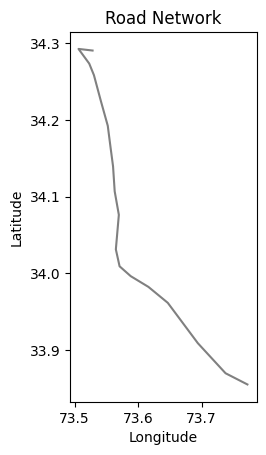

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming road_network_gdf is your GeoDataFrame
road_network_gdf.iloc[44:45].plot(edgecolor='black', color='gray')

# Optionally, plot additional layers or points
# For example, if you have `sample_data_gdf` as another GeoDataFrame:
# sample_data_gdf.plot(ax=plt.gca(), color='red', markersize=5)

plt.title('Road Network')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
